# **Importing Required Libraries**

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# **Exploratory Data Analysis**

In [4]:
# Veri Setini İçe Aktarma
data = pd.read_csv("insurance.csv")

df = data.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Veri hakkında temel istatistiksel bilgileri görüntüleme
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


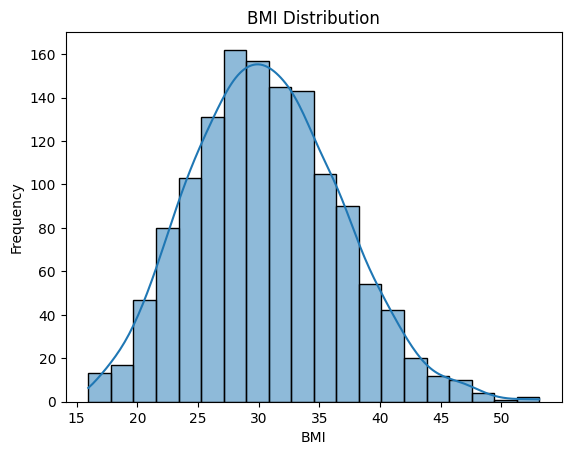

In [6]:
# Vücut Kitle İndeksi (BMI) dağılımını inceleme
sns.histplot(data['bmi'], bins=20, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

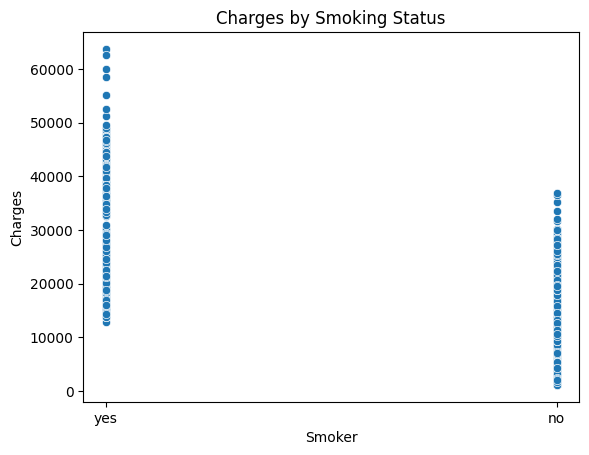

In [7]:
#"Sigara içen" ile "maliyet" arasındaki ilişkiyi inceleme
sns.scatterplot(x="smoker", y="charges", data=data)
plt.title('Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.xticks(rotation=0)
plt.show()


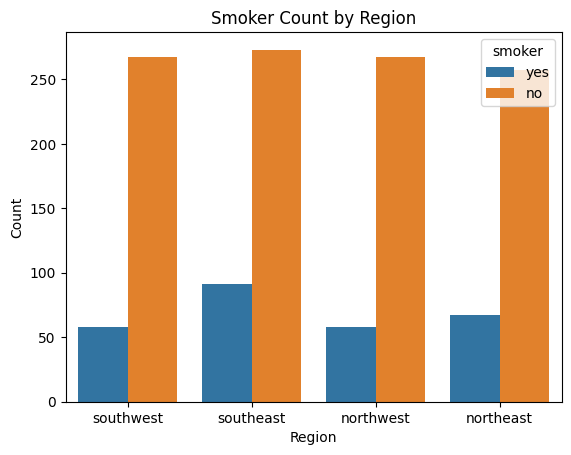

In [8]:
# "Sigara içen" ile "bölge" arasındaki ilişkiyi inceleme
sns.countplot(x ='region', hue ='smoker', data = data)
plt.title('Smoker Count by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

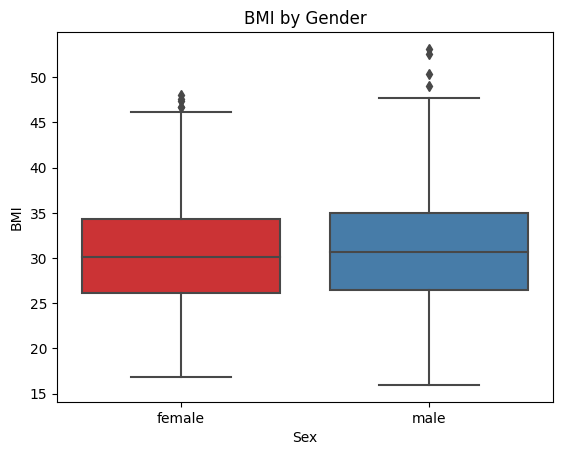

In [9]:
# "BMI" ile "cinsiyet" arasındaki ilişkiyi inceleme
sns.boxplot(x='sex', y='bmi', data=data, palette='Set1')
plt.title('BMI by Gender')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()


Region with the most children: southeast


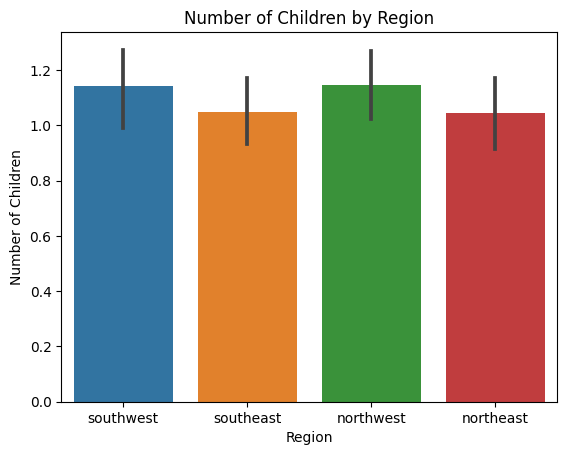

region
northeast    339
southwest    371
northwest    373
southeast    382
Name: children, dtype: int64

In [10]:
# "Bölge"de en fazla "çocuk" sayısına sahip bölgeyi bulma
most_children_region = data.groupby('region')['children'].sum().idxmax()
print(f"Region with the most children: {most_children_region}")

# En fazla çocuğa sahip bölgenin çocuk sayısını hesaplama
most_children_count = data[data['region'] == most_children_region]['children'].sum()

# "Bölge"de en fazla çocuğa sahip bölgeyi görselleştirme
sns.barplot(x='region', y='children', data=data)
plt.title('Number of Children by Region')
plt.xlabel('Region')
plt.ylabel('Number of Children')
plt.show()

children_count = df.groupby("region")["children"].sum()
children_count.sort_values()


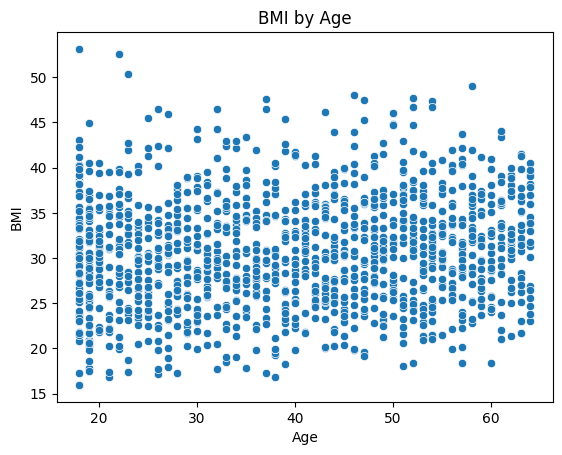

In [11]:
# "Yaş" ile "BMI" arasındaki ilişkiyi inceleme
sns.scatterplot(x='age', y='bmi', data=data)
plt.title('BMI by Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

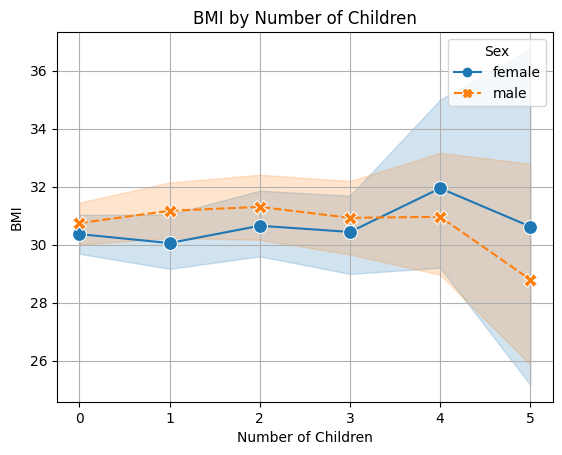

In [12]:
# "BMI" ile "çocuk" arasındaki ilişkiyi inceleme

# Her bir cinsiyet için farklı renkler kullanıldı
sns.lineplot(x='children', y='bmi', data=data, hue='sex', style='sex', markers=True, markersize=10)

plt.title('BMI by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('BMI')
plt.xticks(data['children'].unique())
plt.legend(title='Sex', loc='upper right')
plt.grid(True)
plt.show()



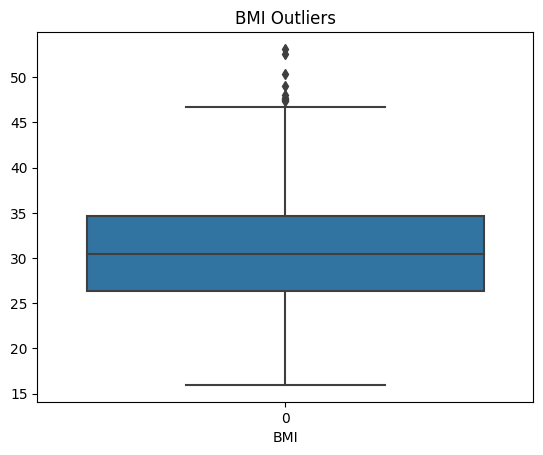

Number of lower outliers: 0
Lower outliers:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

Number of upper outliers: 9
Upper outliers:
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


In [15]:
# "BMI" de aykırı değer var mı?
sns.boxplot(data['bmi'])
plt.title('BMI Outliers')
plt.xlabel('BMI')
plt.show()

# Aykırı değerleri hesaplama
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_lower = data[data['bmi'] < lower_bound]
outliers_upper = data[data['bmi'] > upper_bound]

print("Number of lower outliers:", len(outliers_lower))
print("Lower outliers:")
print(outliers_lower)

print("\nNumber of upper outliers:", len(outliers_upper))
print("Upper outliers:")
print(outliers_upper)


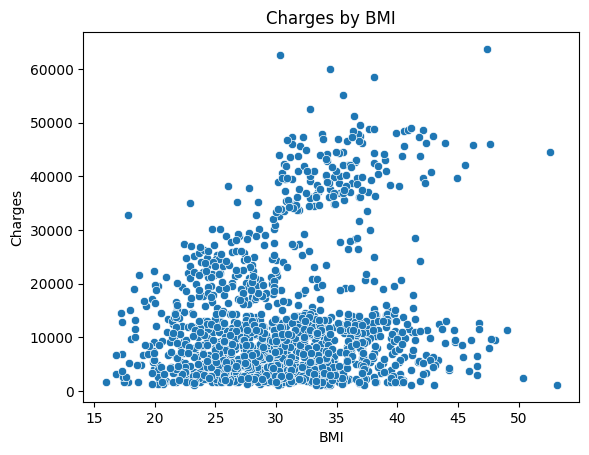

In [16]:
# "BMI" ile "maliyet" arasındaki ilişkiyi inceleme
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title('Charges by BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

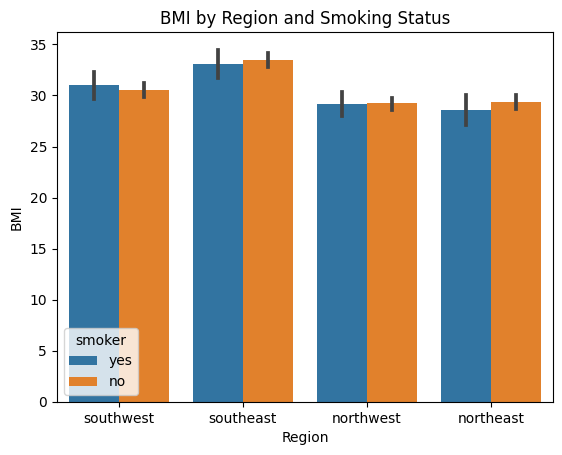

In [ ]:
# "Bölge", "sigara içen" ve "BMI" arasındaki ilişkiyi çubuk grafik kullanarak inceleme
sns.barplot(x='region', y='bmi', hue='smoker', data=data)
plt.title('BMI by Region and Smoking Status')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.show()

# **Data Preprocessing**

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


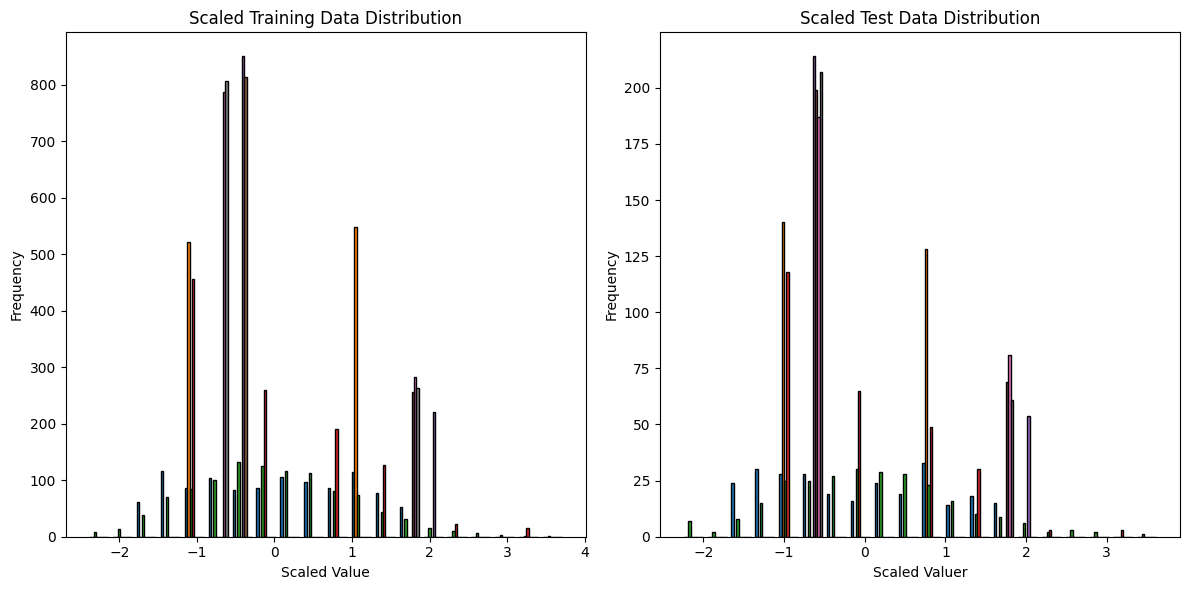

In [18]:
# Veri Ön İşleme

# Label Encoding
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])

# One-Hot Encoding
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_region = onehot_encoder.fit_transform(data[['region']])
encoded_region_df = pd.DataFrame(encoded_region, columns=['region_1', 'region_2', 'region_3'])  # Yeni DataFrame
data_encoded = pd.concat([data.drop(['region'], axis=1), encoded_region_df], axis=1)  # Orijinal 'region' sütunu çıkarıldı

X = data_encoded.drop(['charges'], axis=1)
y = data_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Histogramlar ile veri dağılımını görselleştirme
plt.figure(figsize=(12, 6))

# Ölçeklendirilmiş eğitim verisi
plt.subplot(1, 2, 1)
plt.hist(X_train_scaled, bins=20, edgecolor='black')
plt.title('Scaled Training Data Distribution')
plt.xlabel('Scaled Value')
plt.ylabel('Frequency')

# Ölçeklendirilmiş test verisi
plt.subplot(1, 2, 2)
plt.hist(X_test_scaled, bins=20, edgecolor='black')
plt.title('Scaled Test Data Distribution')
plt.xlabel('Scaled Valuer')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# **Model Selection**

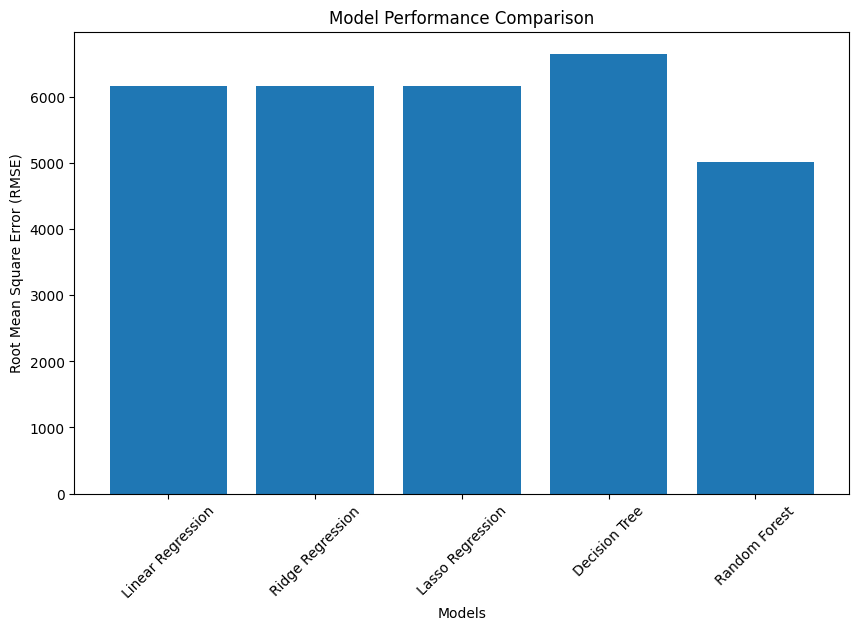

Linear Regression: RMSE = 6160.1860
Ridge Regression: RMSE = 6160.0435
Lasso Regression: RMSE = 6160.0829
Decision Tree: RMSE = 6653.2292
Random Forest: RMSE = 5014.3964

Top performing model: Random Forest
Best performance value (RMSE): 5014.396359220284


In [ ]:
# Modelleri oluşturma
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor())
]

# Çapraz doğrulama sonuçlarını saklamak için bir sözlük
cv_rmse_scores = {}

# Modelleri çapraz doğrulama ile değerlendirme
for name, model in models:
    y_pred = cross_val_predict(model, X_train_scaled, y_train, cv=5)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    cv_rmse_scores[name] = rmse

# Performansı görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(cv_rmse_scores.keys(), cv_rmse_scores.values())
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Root Mean Square Error (RMSE)')
plt.xticks(rotation=45)
plt.show()

# Tüm modellerin RMSE skorlarını yazdırma
for name, rmse in cv_rmse_scores.items():
    print(f"{name}: RMSE = {rmse:.4f}")


# En iyi performans gösteren modeli seçme
best_model = min(cv_rmse_scores, key=cv_rmse_scores.get)
print("\nTop performing model:", best_model)
print("Best performance value (RMSE):", cv_rmse_scores[best_model])


# **Hyperparameter Optimization**

In [20]:
# Model: Random Forest Regressor
model = RandomForestRegressor()

# Parametrelerin olası değerleri
param_grid = {
    # Oluşturulacak ağaç sayısı
    'n_estimators': [100, 150, 200, 250, 300],

    # Her bir ağacın maksimum derinliği
    'max_depth': [None, 5, 10, 15, 20, 25, 30],

    # Bir düğümün ikiye bölünmesi için gereken minimum örnek sayısı
    'min_samples_split': [2, 3, 5, 7, 10],

    # Bir yaprak düğümünde gereken minimum örnek sayısı
    'min_samples_leaf': [1, 2, 3, 4, 5],

    # Bir düğümde göz önünde bulundurulacak maksimum özellik sayısı
    'max_features': ['auto', 'sqrt', 'log2']
}


# Izgara arama yapma
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# En iyi parametreler ve en iyi skor
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)
print("En iyi parametreler:", best_params)
print("En iyi RMSE skoru:", best_rmse)


Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is al

En iyi parametreler: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 250}
En iyi RMSE skoru: 4653.550626401842


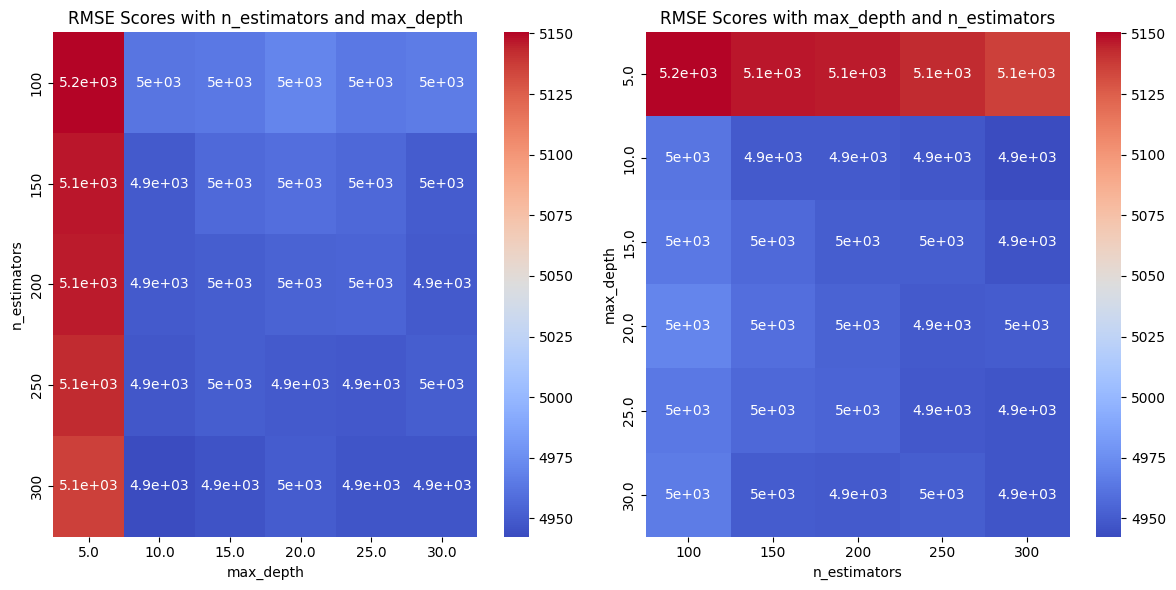

<Figure size 800x600 with 0 Axes>

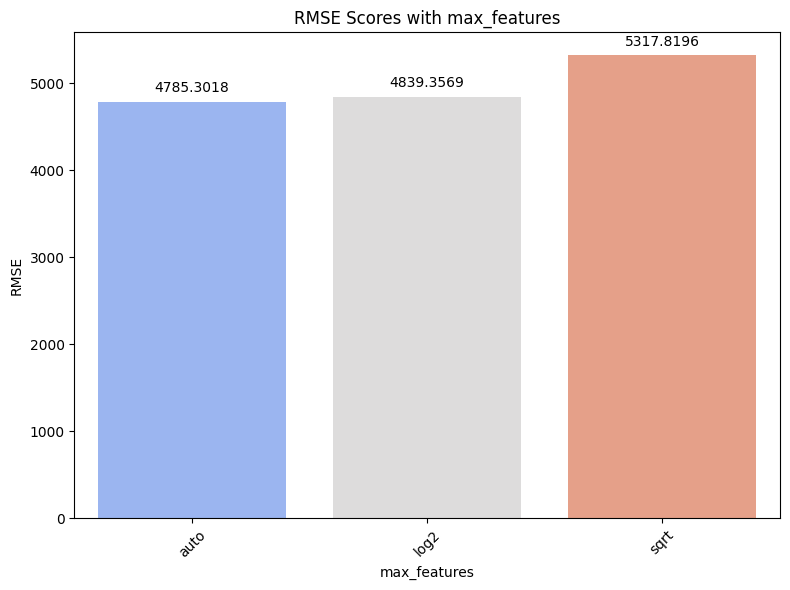

In [21]:
# Parametre kombinasyonları ve RMSE skorları
param_combinations = pd.DataFrame(grid_search.cv_results_['params'])
param_combinations['rmse'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])

plt.figure(figsize=(12, 6))

# n_estimators için görselleştirme
plt.subplot(1, 2, 1)
heatmap_data_n_estimators = param_combinations.pivot_table(index='n_estimators', columns='max_depth', values='rmse')
sns.heatmap(heatmap_data_n_estimators, annot=True, cmap='coolwarm')
plt.title('RMSE Scores with n_estimators and max_depth')
plt.xlabel('max_depth')
plt.ylabel('n_estimators')

# max_depth için görselleştirme
plt.subplot(1, 2, 2)
heatmap_data_max_depth = param_combinations.pivot_table(index='max_depth', columns='n_estimators', values='rmse')
sns.heatmap(heatmap_data_max_depth, annot=True, cmap='coolwarm')
plt.title('RMSE Scores with max_depth and n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))

plt.figure(figsize=(8, 6))

# max_features için görselleştirme
heatmap_data_max_features = param_combinations.pivot_table(index='max_features', values='rmse')
ax = sns.barplot(x=heatmap_data_max_features.index, y=heatmap_data_max_features['rmse'], palette='coolwarm')
plt.title('RMSE Scores with max_features')
plt.xlabel('max_features')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

# Değerleri grafiğe eklemek
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()



# **Model Evaluation**

In [25]:
# Modelin tahminleri
y_pred_rf = grid_search.best_estimator_.predict(X_test_scaled)

# MSE hesaplama
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Square Error for Random Forest (MSE):", mse_rf)

# MAE hesaplama
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Average Absolute Error for Random Forest (MAE):", mae_rf)

# R-kare hesaplama
r2_rf = r2_score(y_test, y_pred_rf)
print("R-squared for Random Forest:", r2_rf)





Mean Square Error for Random Forest (MSE): 18741309.102239806
Average Absolute Error for Random Forest (MAE): 2476.2419754491057
R-squared for Random Forest: 0.8792820468022124
